# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 8 ноября 2022

Мягкий дедлайн: 23:30MSK 22 ноября 2022 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:30MSK 29 ноября 2021.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 4.8 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [28]:
%pylab inline
import pandas as pd

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [29]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Выведите  количество коэффициентов (веса, они же составляют вектор w) близких к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями? 

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np

thr = 0.1
n_coeffs = {'ridge': [], 'lasso': []}
lambdas = np.logspace(-3, 4, num=30)
for l in lambdas:
    #print('Regularization coefficient =', str(l))
    model_1 = Ridge(alpha=l).fit(X_train, y_train)
    n_coeffs['ridge'].append((np.abs(model_1.coef_) > thr).sum())

    model = Lasso(alpha=l).fit(X_train, y_train)
    n_coeffs['lasso'].append((np.abs(model.coef_) > thr).sum())

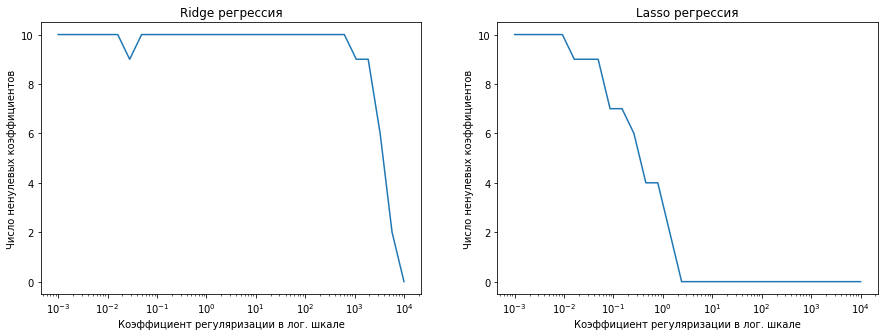

In [31]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(lambdas, n_coeffs['ridge'])
plt.title('Ridge регрессия')
plt.xlabel('Коэффициент регуляризации в лог. шкале')
plt.ylabel('Число ненулевых коэффициентов')
plt.xscale('log')

plt.subplot(1, 2, 2)
plt.plot(lambdas, n_coeffs['lasso'])
plt.title('Lasso регрессия')
plt.xlabel('Коэффициент регуляризации в лог. шкале')
plt.ylabel('Число ненулевых коэффициентов')
plt.xscale('log')

plt.show()

Полученные результаты (уменьшение числа ненулевых коэффициентов с ростом влияния регуляризации) согласуются с ожиданием: чем больше коэффициент регуляризации, тем сильнее модель стремится уменьшить веса в процессе обучения. Коэффициенты перебирались от $10^-3$ до $10^4$, поскольку при коэффициенте, равном $10^3$ не так хорошо наблюдалось поведение коэффициентов для ridge - регрессии.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = Ridge().fit(X_train, y_train)
y_pred = model.predict(X_test)
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))

RMSE = 58.304415127748044
MAE = 49.60284607275299
R-squared = 0.3598993868368464


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости трех перечисленных выше метрик от коэффициента регуляризации. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

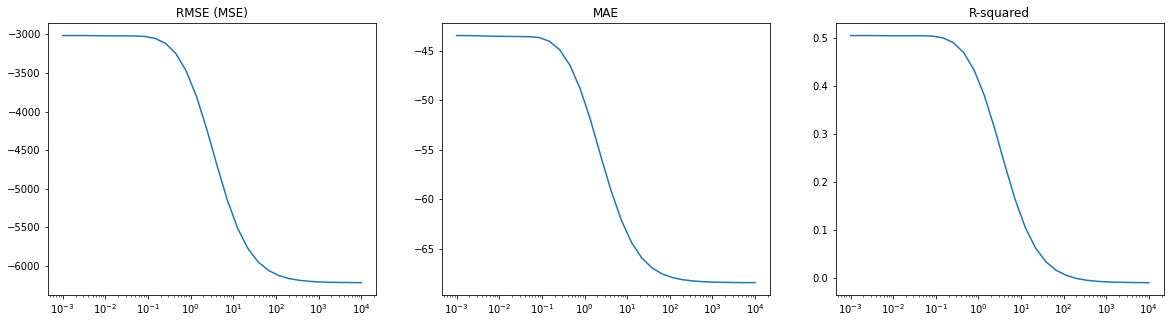

In [33]:
from sklearn.model_selection import GridSearchCV, KFold
parameters = {"alpha": lambdas}
plt.figure(figsize=(20, 5))
scorings = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
titles = ['RMSE (MSE)', 'MAE', 'R-squared']
for i in range(3):
    model = Ridge()
    grid = GridSearchCV(model, parameters, scoring=scorings[i])
    grid.fit(X_train, y_train)
    df = pd.DataFrame(grid.cv_results_)
    plt.subplot(1, 3, i+1)
    plt.plot(df['param_alpha'], df['mean_test_score'])
    plt.title(titles[i])
    plt.xscale('log')
plt.show()

Эксперименты показали, что для всех трех функций потерь: $RMSE$, $MAE$, $R^2$ величина функции потерь увеличивается с ростом влияния регуляризации, что ожидаемо: регуляризация не дала весам полностью "подогнаться" под выборку.

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

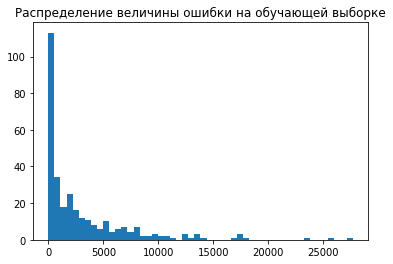

In [34]:
from sklearn.model_selection import cross_val_predict
model = Ridge(alpha=0.001)
y_pred = cross_val_predict(model, X_train, y_train, cv=5)
error = (y_pred-y_train)**2
plt.hist(error, bins=50)[2]
plt.title('Распределение величины ошибки на обучающей выборке')
plt.show()

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [35]:
error_thr = 5000
X_train_m = X_train[error <= error_thr]
y_train_m = y_train[error <= error_thr]
model = Ridge().fit(X_train_m, y_train_m)
y_pred = model.predict(X_test)
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))

RMSE = 58.92505691200519
MAE = 49.92355131970272
R-squared = 0.34619930451449354


**Ответ: качество модели по всем трем метрикам улучшилось, потому что, вероятно, те данные в обучающей выборке, на которых функция потерь принимала большие значения, были выбросами, и их не стоило учитывать при обучении. В то же время модель все-таки смотрела на них и довольно сильно учитывала их (потому что они дают большой вклад в ошибку), а их не стоило учитывать, так как это скорее выбросы из данных. Таким образом, убрав их, мы улучшили качество модели "в среднем", так как теперь она меньше смотрит на выбросы и больше - на более типичные данные.**

## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [ ]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [ ]:
from sklearn.metrics import auc, roc_curve, plot_roc_curve, roc_auc_score, precision_recall_curve
y_pred = model.predict(X_test)
print('ROC-AUC:', roc_auc_score(y_test, y_pred))
precision, recall, thr = precision_recall_curve(y_test, y_pred)
print('PR-AUC =', auc(recall, precision))

ROC-AUC: 0.8505995478477648
PR-AUC = 0.8875506188669232


In [36]:
def plot_curves(y_test, probs, pr=False, roc=False):
    if roc and pr:
        fp_rate, tp_rate, _ = roc_curve(y_test, probs)
        precision, recall, _ = precision_recall_curve(y_test, probs)
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.title('ROC-curve')
        plt.plot(fp_rate, tp_rate, label='')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.grid()
        plt.subplot(1,2,2)
        plt.title('PR-curve')
        plt.plot(recall, precision, label='')
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.grid()
    elif roc:
        fp_rate, tp_rate, _ = roc_curve(y_test, probs)
        plt.figure(figsize=(15,5))
        plt.subplot(1,1,1)
        plt.title('ROC-curve')
        plt.plot(fp_rate, tp_rate, label='')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.grid()
    elif pr:
        precision, recall, _ = precision_recall_curve(y_test, probs)
        plt.figure(figsize=(10, 10))
        plt.subplot(1,1,1)
        plt.title('PR-curve')
        plt.plot(recall, precision, label='')
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.grid()
    plt.show()

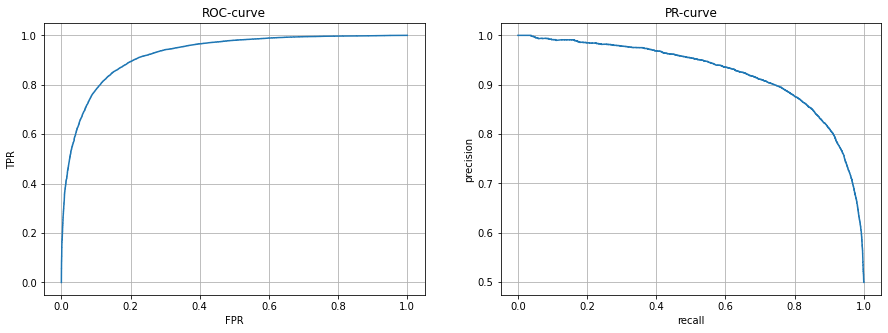

In [ ]:
plot_curves(y_test, model.decision_function(X_test), roc=True, pr=True)

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

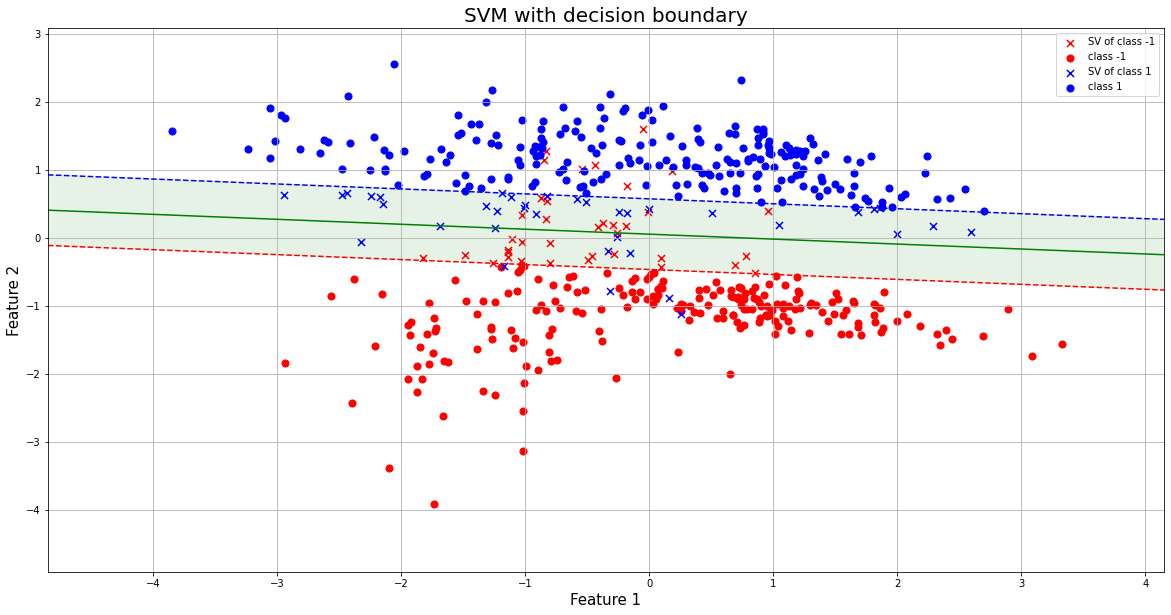

In [105]:
from sklearn.svm import SVC
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0)
clf = SVC(kernel='linear').fit(X, y)
classes = np.unique(y)

# Для постройки некоторых элементов графика использовалась информация со страницы
# https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface

xx, yy = np.meshgrid(np.arange(X[:, 0].min()-1, X[:, 0].max()+1), np.arange(X[:, 1].min()-1, X[:, 1].max()+1))
hyperplane = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(20,10))
lines = plt.contour(xx, yy, hyperplane, colors=['r', 'g', 'b'], levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'])
plt.contourf(xx, yy, hyperplane, colors='g', levels=[-1, 0, 1], alpha=0.1)

colors = ['r', 'b']
labels = [-1, 1]

for i in range(2):
    idx = np.argwhere(y == classes[i])
    support_idx = np.intersect1d(idx, clf.support_)
    plt.scatter(X[:, 0][support_idx], X[:, 1][support_idx], c=colors[i], marker='x', s=50, label='SV of class ' + str(labels[i]))

    other = idx[~np.isin(idx, support_idx)]
    plt.scatter(X[:, 0][other], X[:, 1][other], c=colors[i], s=50, label='class ' + str(labels[i]))

plt.title('SVM with decision boundary', fontsize=20)
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)
plt.legend()
plt.grid()
plt.show()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [ ]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) # first +-
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1)) # second min mean
    plt.plot(bin_middle_points, bin_real_ratios)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

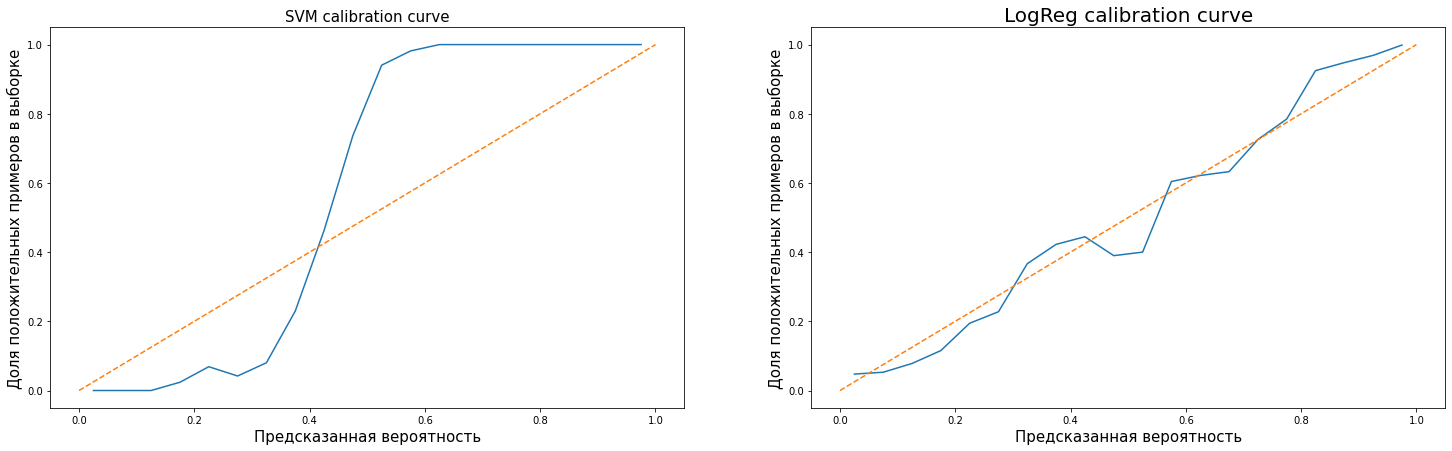

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression().fit(X_train, y_train)
probs_logreg = logreg_model.predict_proba(X_test)

svm_model = LinearSVC().fit(X_train, y_train)
probs_svm = svm_model.decision_function(X_test)
probs_svm = MinMaxScaler().fit_transform(probs_svm.reshape(-1, 1))

plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.title('SVM calibration curve', fontsize=15)
plot_calibration_curve(y_test, probs_svm.ravel())
plt.xlabel('Предсказанная вероятность', fontsize=15)
plt.ylabel('Доля положительных примеров в выборке', fontsize=15)
plt.plot([0, 1], linestyle='dashed')

plt.subplot(1,2,2)
plt.title('LogReg calibration curve', fontsize=20)
plot_calibration_curve(y_test, probs_logreg[:, 1])
plt.xlabel('Предсказанная вероятность', fontsize=15)
plt.ylabel('Доля положительных примеров в выборке', fontsize=15)
plt.plot([0, 1], linestyle='dashed')
plt.show()

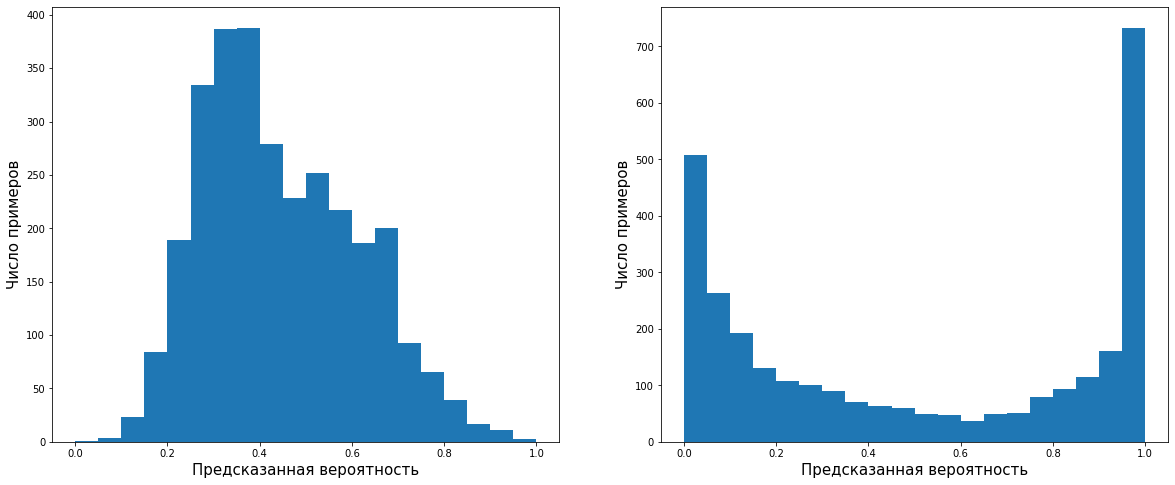

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.hist(probs_svm.ravel(), bins=20)
plt.xlabel('Предсказанная вероятность', fontsize=15)
plt.ylabel('Число примеров', fontsize=15)

plt.subplot(1,2,2)
plt.hist(probs_logreg[:, 1], bins=20)
plt.xlabel('Предсказанная вероятность', fontsize=15)
plt.ylabel('Число примеров', fontsize=15)
plt.show()

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_svm = CalibratedClassifierCV().fit(X_train, y_train)
calibrated_probs = calibrated_svm.predict_proba(X_test)

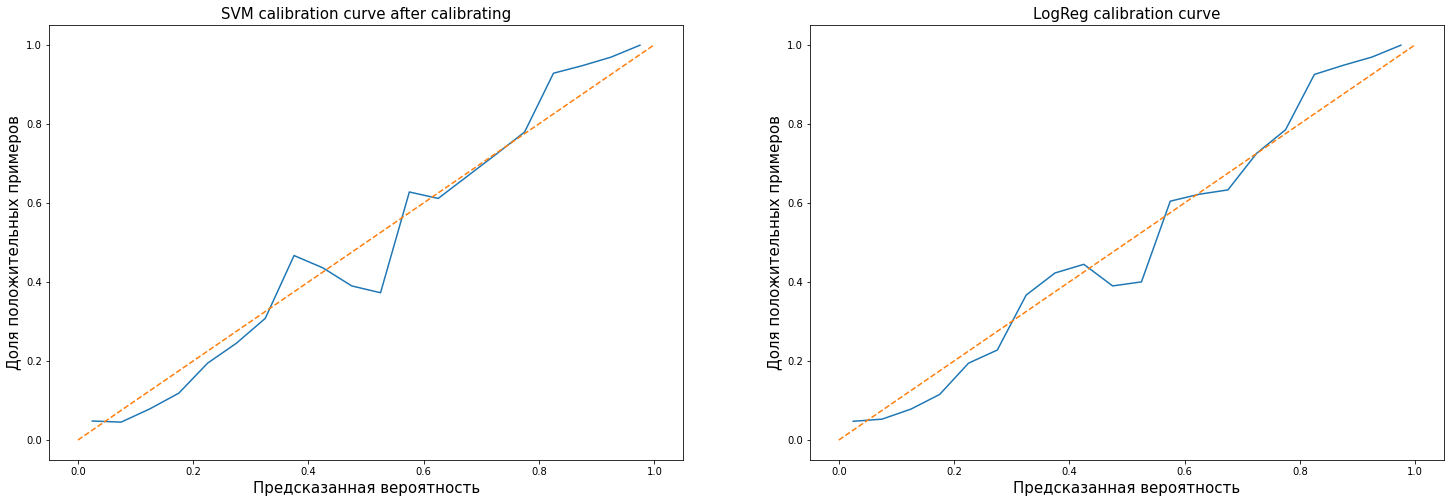

In [ ]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.title('SVM calibration curve after calibrating', fontsize=15)
plot_calibration_curve(y_test, calibrated_probs[:, 1])
plt.xlabel('Предсказанная вероятность', fontsize=15)
plt.ylabel('Доля положительных примеров', fontsize=15)
plt.plot([0, 1], linestyle='dashed')

plt.subplot(1,2,2)
plt.title('LogReg calibration curve', fontsize=15)
plot_calibration_curve(y_test, probs_logreg[:, 1])
plt.xlabel('Предсказанная вероятность', fontsize=15)
plt.ylabel('Доля положительных примеров', fontsize=15)
plt.plot([0, 1], linestyle='dashed')
plt.show()

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [ ]:
class Calibration():
    def __init__(self, n_bins=20):
        self.n_bins=n_bins
        self.bins = np.linspace(0, 1, self.n_bins+1)
        self.d = dict.fromkeys([i for i in range(n_bins)])

    def fit(self, y_train, probs):
        #probs = (probs - probs.min()) / (probs.max() - probs.min())
        for i in range(self.n_bins):
            mask = np.where((probs >= self.bins[i]) & (probs < self.bins[i+1]))
            real_prob = y_train[mask].mean()
            if np.isnan(real_prob):
                self.d[i] = (self.bins[i] + self.bins[i+1])/2
            else:
                self.d[i] = real_prob

    def transform(self, probs):
        #probs = (probs - probs.min()) / (probs.max() - probs.min())
        result = np.zeros(shape=probs.shape)
        for i in range(self.n_bins):
            mask = np.where((probs >= self.bins[i]) & (probs < self.bins[i+1]))
            our_probs = probs[mask]
            if len(our_probs) == 0:
                continue
            subtracted_mean = our_probs - our_probs.mean()
            v = (our_probs.max() - our_probs.min())
            removed_variation = subtracted_mean / v
            added_variation = removed_variation * (self.bins[i+1] - self.bins[i])
            result[mask] = added_variation + self.d[i]
            
            #result[mask] = self.d[i]
        return result

In [ ]:
class new_calib():
    def __init__(self, n_bins=20):
        self.n_bins=n_bins
        self.bins = np.linspace(0, 1, self.n_bins+1)
        self.d = {}

    def fit(self, y_train, probs):
        #probs = (probs - probs.min()) / (probs.max() - probs.min())
        for i in range(self.n_bins):
            mask = np.where((probs >= self.bins[i]) & (probs < self.bins[i+1]))
            real_val = (y_train[mask]==1).mean()
            if np.isnan(real_val):
                real_val = (self.bins[i] + self.bins[i+1])/2
            self.d[i] = real_val

    def transform(self, probs):
        #probs = (probs - probs.min()) / (probs.max() - probs.min())
        result = np.zeros(shape=probs.shape)
        for i in range(self.n_bins):
            mask = np.where((probs >= self.bins[i]) & (probs < self.bins[i+1]))
            #print(mask)
            result[mask] = self.d[i]
        return result

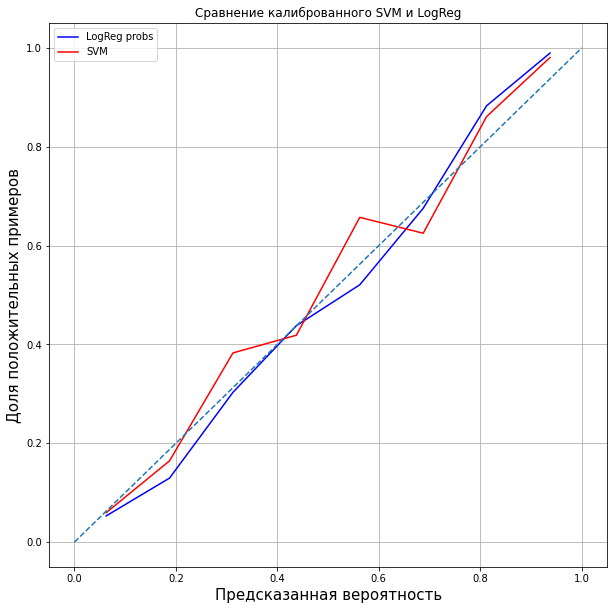

In [ ]:
n_bins = 8
model = SVC(kernel='linear', probability=True).fit(X_train, y_train)
c = Calibration(n_bins=n_bins)
probs = model.predict_proba(X_train)[:, 1]
c.fit(y_train, probs)
probs = model.predict_proba(X_test)[:, 1]
c_probs = c.transform(probs)

logreg_probs = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)[:, 1]
plt.figure(figsize=(10,10))
bin_middle_points = []
bin_real_ratios = []
for i in range(n_bins):
    l = 1.0 / n_bins * i
    r = 1.0 / n_bins * (i + 1)
    bin_middle_points.append((l + r) / 2)
    bin_real_ratios.append(np.mean(y_test[(logreg_probs >= l) & (logreg_probs < r)] == 1))
plt.plot(bin_middle_points, bin_real_ratios, label='LogReg probs', c='b')


bin_middle_points = []
bin_real_ratios = []
for i in range(n_bins):
    l = 1.0 / n_bins * i
    r = 1.0 / n_bins * (i + 1)
    bin_middle_points.append((l + r) / 2)
    bin_real_ratios.append(np.mean(y_test[(c_probs >= l) & (c_probs < r)] == 1))
plt.plot(bin_middle_points, bin_real_ratios, label='SVM', c='r')
plt.title('Сравнение калиброванного SVM и LogReg')
plt.xlabel('Предсказанная вероятность', fontsize=15)
plt.ylabel('Доля положительных примеров', fontsize=15)
plt.plot([0, 1], linestyle='dashed')
plt.legend()
plt.grid()
plt.show()

Суть реализованного метода состоит в том, чтобы:
1. Разбить отрезок от 0 до 1 на бины
2. Совершить предсказания вероятностей для обучающей выборки
3. Для каждого бина номер $i$ посмотреть, для каких объектов из обучающей выборки предсказанные вероятности попали в этот бин $i$, и для каждого бина выполнить следующий пункт
4. Посмотреть, какая в действительности доля этих объектов имеет метку класса = 1. И запомнить этот параметр - обозначим его $\theta_i$. Поскольку эта доля = вероятности того, что объект из выборки имеет класс = 1 при условии, что предсказанная для него вероятность попала в данный бин

Таким образом, после этого процесса у нас для каждого бина есть одно число $\theta_i$, которое мы запомнили - вероятность того, что объект из обучающей выборки имеет класс = 1 при условии, что предсказанная для него вероятность попала в данный бин.

Далее, при наличии предсказаний для тестовой выборки, можно осуществить калибровку вероятностей:

1. Для каждого бина из первой части посмотреть, какие из предсказанных вероятностей в него попадают
2. Мы знаем, что в среднем для всех таких объектов (судя по обучающей выборке) вероятность должна равняться как раз тому числу, которое мы запомнили для этого бина. Можно было бы заменить все вероятности, попавшие в этот бин $i$, на это число $\theta_i$. Тогда это был бы метод Histogram Bining, с которым я познакомился во время выполнения этого задания. Но дело в том, что если общее число бинов невелико, то после калибровки вероятности могут принимать лишь небольшое число значений, равное количеству бинов. Возможно, это не так хорошо, поэтому в этой реализации калибровки $\theta_i$ искользуется как среднее значение.
3. Берем все вероятности, попавшие в данный бин, и преобразуем их так, чтобы среднее их значение было равно $\theta_i$, а минимальное и максимальное совпадало со значениями функции $f(x) = x$ на границе бина.

Полученные результаты можно видеть на графике выше. Красная линия - это результат моей калибровки, а синяя - это вероятности, предсказанные логистической регрессией.

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [39]:
from google.colab import drive
drive.mount('/content/gdrive')
PR_DIR = '/content/gdrive/MyDrive/MMRO_MSU/dataset_4_hw3/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [40]:
data = pd.read_csv(PR_DIR + 'Dataset_4_hw3/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [41]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [48]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import log_loss

warnings.filterwarnings('ignore', category=ConvergenceWarning)
model = LogisticRegression(max_iter=1000, tol=0.0001).fit(X_train, y_train)
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)

In [49]:
precision, recall, _ = precision_recall_curve(y_test, y_probs[:, 1])

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

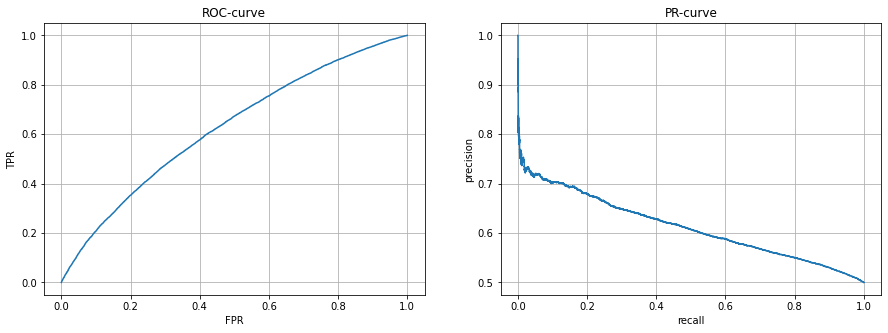

In [50]:
from sklearn.metrics import auc, roc_curve, plot_roc_curve, roc_auc_score, precision_recall_curve
plot_curves(y_test, model.decision_function(X_test), roc=True, pr=True)

In [51]:
print('ROC-AUC score:', roc_auc_score(y_test, y_probs[:, 1]))
print('PR-AUC score:', auc(recall, precision))

ROC-AUC score: 0.6250909902013102
PR-AUC score: 0.6128562686043171


**Ответ: по величинам метрик и виду графиков можно сказать, что модель обучилась не очень хорошо: так, в самом начале с ростом полноты точность (precision) падает очень быстро.**



__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [52]:
losses_train, losses_test = {}, {}
lambdas = np.logspace(-3, 0, num=4)
for l in lambdas:
    loss_train, loss_test = [], []
    model = LogisticRegression(warm_start=True, C=1/l,
                               max_iter=25, random_state=0)
    for step in tqdm(range(40)):
        model.fit(X_train, y_train)
        loss_train.append(log_loss(y_train, model.predict_proba(X_train)))
        loss_test.append(log_loss(y_test, model.predict_proba(X_test)))
    losses_train[l] = loss_train
    losses_test[l] = loss_test

100%|██████████| 40/40 [00:26<00:00,  1.50it/s]


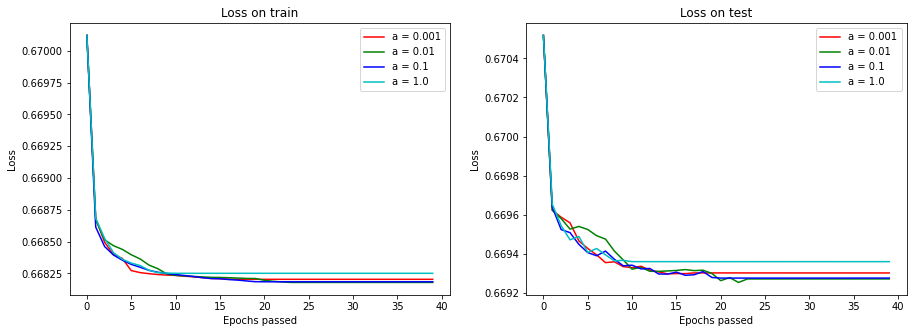

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(len(lambdas)):
    plt.plot(np.arange(40), losses_train[lambdas[i]], label='a = ' + str(lambdas[i]), c=colors[i])
plt.title('Loss on train')
plt.ylabel('Loss')
plt.xlabel('Epochs passed')
plt.legend()
plt.subplot(1, 2, 2)
for i in range(len(lambdas)):
    plt.plot(np.arange(40), losses_test[lambdas[i]], label='a = ' + str(lambdas[i]), c=colors[i])
plt.title('Loss on test')
plt.ylabel('Loss')
plt.xlabel('Epochs passed')
plt.legend()
plt.show()

По графикам заметно, что на тестовой выборке лучше всего показала себя модель с коэффициентом регуляризации, равным 0.1. Похоже, это не слишком большое значение, чтобы слишком сильно штрафами мешать модели обучаться (как коэффициент = 1), и не слишком маленькое, чтобы совсем слабо влиять на обучение.

Для удобства анализа на график вынесены значения функции потерь через каждые 25 итераций, всего модель обучалась $25 \times 40 = 1000$ шагов.

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [53]:
print('ROC-AUC score:', roc_auc_score(y_test, y_probs[:, 1]))

ROC-AUC score: 0.6250909902013102


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [54]:
X_train.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [55]:
from sklearn.preprocessing import OneHotEncoder

def encode(X, encoder):
    test_cat = X[[i for i in X.columns if 'cat' in i]]
    one_hot_cat = pd.DataFrame(encoder.fit_transform(test_cat))
    X.reset_index(drop=True, inplace=True)
    one_hot_cat.reset_index(drop=True, inplace=True)
    return pd.concat((X[[i for i in X.columns if 'cat' not in i]], one_hot_cat), axis=1)
encoder = OneHotEncoder(sparse=False)
X_test_one_hot = encode(X_test, encoder)
X_train_one_hot = encode(X_train, encoder)

In [56]:
from time import time

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

start = time()
one_hot_model = LogisticRegression().fit(X_train_one_hot, y_train)
finish = time()
print('Elapsed time:', finish - start)
y_probs = one_hot_model.predict_proba(X_test_one_hot)
print("Train ROC-AUC score:", roc_auc_score(y_test, y_probs[:, 1]))
print("Test ROC-AUC score:", roc_auc_score(y_test, y_probs[:, 1]))

Elapsed time: 5.888327121734619
Train ROC-AUC score: 0.6327201259111699
Test ROC-AUC score: 0.6327201259111699


Видим, что one-hot кодирование категориальных признаков положительно повлияло на качество модели

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [57]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [66]:
class Counters():
    def __init__(self, sigma=0.0, C=0.0, only_prev=False):
        self.sigma=sigma
        self.features_map = {}
        self.C = C
        self.only_prev=only_prev

    def add_noise(self, X):
        noise = np.random.default_rng()
        for name in self.features_map.keys():
            X[name] = X[name] + noise.normal(scale=self.sigma, size=len(X[name]))
        return X

    def fit_transform(self, X, y):
        for i in range(len(X.columns)):
            if 'cat' in str(X.columns[i]):
                self.features_map[X.columns[i]] = dict()
                new_col = X.iloc[:, i].copy()
                uniq_vals = X.iloc[:, i].unique()
                for v in uniq_vals:
                    mask = X.iloc[:, i]==v
                    g_mean = X.iloc[:, i].mean()
                    if self.only_prev:
                        y_mask = y[np.array(X[i]) == v]
                        x_mask = X[i] == v
                        new_value = y_mask.cumsum() / x_mask.cumsum()[x_mask]
                    else:
                        new_value = ((mask & y).sum() + self.C * g_mean) / ((mask).sum() + self.C)
                    new_col[mask] = new_value
                    self.features_map[X.columns[i]][v] = new_value
                X[X.columns[i]] = new_col
        return self.add_noise(X) if self.sigma != 0.0 else X
    
    def transform(self, X):
        res = X.copy()
        for name in self.features_map.keys():
            d = self.features_map[name]
            for key in d.keys():
                res[name][X[name] == key] = d[key]
        return self.add_noise(res) if self.sigma != 0.0 else res

In [67]:
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
sigmas = [0.001, 0.01, 0.1, 1, 2, 10, 100]
times = []
for s in sigmas:
    start = time()
    cnt = Counters(sigma=s)
    X_tr = cnt.fit_transform(X_train_one_hot.copy(), y_train)
    X_ts = cnt.transform(X_test_one_hot.copy())
    model = LogisticRegression(max_iter=1000).fit(X_tr, y_train)
    finish=time()
    times.append(finish-start)
    probs = model.predict_proba(X_ts)
    print('ROC-AUC score for noise level =', str(s), 'is', roc_auc_score(y_test, probs[:, 1]))
print('Average elapsed time over all models is', sum(times) / len(times), 'seconds')

ROC-AUC score for noise level = 0.001 is 0.632921181114065
ROC-AUC score for noise level = 0.01 is 0.632921181114065
ROC-AUC score for noise level = 0.1 is 0.632921181114065
ROC-AUC score for noise level = 1 is 0.632921181114065
ROC-AUC score for noise level = 2 is 0.632921181114065
ROC-AUC score for noise level = 10 is 0.632921181114065
ROC-AUC score for noise level = 100 is 0.632921181114065
Average elapsed time over all models is 86.55895788328988 seconds


**Ответ: по непонятным причинам в последний момент перестало существовать различие между разными степенями шума. Однако в этом запуске, как и в предыдущих, можно видеть, что при использовании счетчиков качество стало еще более хорошим. Однако их вычисление - более затратный по времени процесс, чем способы, которые использовались ранее. Однако само обучение происходит быстрее, так как данные не "расплываются" на 227 признаков.**

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

In [ ]:
start = time()
cnt = Counters(only_prev=True)
X_tr = cnt.fit_transform(X_train.copy(), y_train)
X_ts = cnt.transform(X_test.copy())
model = LogisticRegression().fit(X_tr, y_train)
finish=time()
print('Elapsed time:', str(finish-start))
probs = model.predict_proba(X_ts)
print('ROC-AUC score =', roc_auc_score(y_test, probs[:, 1]))

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [69]:
start = time()
cnt = Counters(C=10.0)
X_tr = cnt.fit_transform(X_train.copy(), y_train)
X_ts = cnt.transform(X_test.copy())
model = LogisticRegression(max_iter=1000).fit(X_tr, y_train)
finish=time()
print('Elapsed time:', str(finish-start))
probs = model.predict_proba(X_ts)
print('ROC-AUC score =', roc_auc_score(y_test, probs[:, 1]))

Elapsed time: 54.73554587364197
ROC-AUC score = 0.6272575698325089


__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ: при тестировании способа со счетчиками со сглаживанием стало видно, что он дает качество хуже, чем без сглаживания, но незначительно.**

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [70]:
#data = pd.read_csv('train.csv', index_col=0)
data = pd.read_csv(PR_DIR + 'Dataset_4_hw3/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [71]:
from sklearn.preprocessing import OneHotEncoder

def encode(X, encoder):
    test_cat = X[[i for i in X.columns if 'cat' in i]]
    one_hot_cat = pd.DataFrame(encoder.fit_transform(test_cat))
    X.reset_index(drop=True, inplace=True)
    one_hot_cat.reset_index(drop=True, inplace=True)
    return pd.concat((X[[i for i in X.columns if 'cat' not in i]], one_hot_cat), axis=1)
encoder = OneHotEncoder(sparse=False)
X_test_one_hot = encode(X_test, encoder)
X_train_one_hot = encode(X_train, encoder)

In [72]:
print('Мы получили', X_test_one_hot.shape[1], 'признаков.')

Мы получили 227 признаков.


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model = LogisticRegression().fit(X_train_one_hot, y_train)

In [74]:
print('ROC-AUC score =', roc_auc_score(y_test, model.predict_proba(X_test_one_hot)[:, 1]))

ROC-AUC score = 0.6364452112991772


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [75]:
from time import time
start = time()
linmod = LinearRegression().fit(X_train_one_hot, y_train)
w = [(abs(linmod.coef_[i]), i) for i in range(len(linmod.coef_))]
w = sorted(w)[-200:]
finish = time()
print('Elapsed time:', str(finish-start))
#w

Elapsed time: 19.168171644210815


In [76]:
top_idxs = np.array([w[i][1] for i in range(len(w))])

In [77]:
X_train_one_hot.shape

(476169, 227)

In [78]:
X_train_best_features = X_train_one_hot.iloc[:, top_idxs]
X_test_best_features = X_test_one_hot.iloc[:, top_idxs]

logmod = LogisticRegression().fit(X_train_best_features, y_train)
y_pred_proba = logmod.predict_proba(X_test_best_features)
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba[:, 1]))

ROC-AUC: 0.6359241323624983


В результате качество даже немного ухудшилось...

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_one_hot)
X_train_one_hot_trans = scaler.transform(X_train_one_hot)
X_test_one_hot_trans = scaler.transform(X_test_one_hot)

print('Standartized all features:')
s = time()
logmod = LogisticRegression().fit(X_train_one_hot_trans, y_train)
f = time()
y_pred_proba = logmod.predict_proba(X_test_one_hot_trans)
print("Elapsed time for all features:", str(f-s))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba[:, 1]))

print('Feature importances measuring:')
start = time()
linmod = LinearRegression().fit(X_train_one_hot_trans, y_train)
w = [(abs(linmod.coef_[i]), i) for i in range(len(linmod.coef_))]
w = sorted(w)[-200:]
finish = time()
print('Elapsed time for feature ranking:', str(finish-start))

top_idxs = np.array([w[i][1] for i in range(len(w))])
X_train_trans_best = X_train_one_hot_trans[:, top_idxs]
X_test_trans_best = X_test_one_hot_trans[:, top_idxs]
print('Model based on top-200 features:')
s = time()
logmod = LogisticRegression().fit(X_train_trans_best, y_train)
f = time()
y_pred_proba = logmod.predict_proba(X_test_trans_best)
print('Elapsed time for top-200 features model:', str(f-s))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba[:, 1]))

Standartized all features:
Elapsed time for all features: 24.021486043930054
ROC-AUC: 0.6380813873793563
Feature importances measuring:
Elapsed time for feature ranking: 17.68764042854309
Model based on top-200 features:
Elapsed time for top-200 features model: 22.10166049003601
ROC-AUC: 0.637857116825415


Видим, что все подходы дали качество лучше, чем на исходных данных, причем выбрасывание 27 наименее значимых признаков не оправдало себя, то есть не с ним не стало лучше, чем при использовании всех признаков. Также исследование значимости признаков с помощью линейной регрессии заняло время, сравнимое со временем обучения нашей модели.

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

In [80]:
print('Intelligent feature ranking:')
s = time()
importances = []
for i in range(X_train_one_hot.shape[1]):
    feature = X_train_one_hot.iloc[:, i]
    feat_pos = feature[y_train == 1]
    feat_neg = feature[y_train == 0]
    mean_pos, mean_neg = np.mean(feat_pos), np.mean(feat_neg)
    std_pos, std_neg = np.std(feat_pos), np.std(feat_neg)
    n_pos, n_neg = feat_pos.shape[0], feat_neg.shape[0]
    t = abs(mean_pos - mean_neg) / ((n_pos*std_pos**2 + n_neg*std_neg**2) / (n_pos+n_neg))**0.5
    importances.append((t, i))
top_idxs = [pair[1] for pair in sorted(importances, reverse=True)[:200]]
f = time()
print('Elapsed time for feature ranking:', str(f-s))

Intelligent feature ranking:
Elapsed time for feature ranking: 4.658392667770386


In [81]:
X_train_trans_best = X_train_one_hot.iloc[:, top_idxs]
X_test_trans_best = X_test_one_hot.iloc[:, top_idxs]
print('Model based on top-200 features:')
s = time()
logmod = LogisticRegression().fit(X_train_trans_best, y_train)
f = time()
y_pred_proba = logmod.predict_proba(X_test_trans_best)
print('Elapsed time for top-200 features model:', str(f-s))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba[:, 1]))

Model based on top-200 features:
Elapsed time for top-200 features model: 31.968665599822998
ROC-AUC: 0.6385895435358117


### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [82]:
n = X_train_one_hot.shape[0]
n

476169

In [83]:
permutation = np.arange(n)
# permutation = np.random.permutation(permutation)
val_ratio = 0.2
val_idxs = permutation[:int(n*val_ratio)]
tr_idxs = permutation[int(n*val_ratio):]
X_tr = X_train_one_hot.iloc[tr_idxs, :]
X_val = X_train_one_hot.iloc[val_idxs, :]
y_tr = y_train[tr_idxs]
y_val = y_train[val_idxs]
X_tr.shape, X_val.shape

((380936, 227), (95233, 227))

In [90]:
from tqdm import tqdm
def detect_least_helpful_feature(X_train, y_train, X_val, y_val, n_features=1):
    top_score = 0.0
    top_idxs = []
    for i in tqdm(range(X_train.shape[1])):
        idxs = np.random.permutation(np.arange(X_train.shape[1]))[:n_features]
        for i in idxs:
            tr = X_train.drop(X_train.columns[i], axis=1)
            #print(X_train.shape)
            val = X_val.drop(X_val.columns[i], axis=1)
        model = LogisticRegression().fit(tr, y_train)
        probs = model.predict_proba(val)[:, 1]
        score = roc_auc_score(y_val, probs)
        if score > top_score:
            top_score = score
            top_idxs = idxs
    return list(top_idxs)

In [91]:
print('Measuring one iteration time')
s = time()
for i in range(27):
    idx_to_drop = detect_least_helpful_feature(X_tr, y_tr, X_val, y_val)
    print('idx to drop:', idx_to_drop)
    X_tr = X_tr.drop(X_tr.columns[idx_to_drop], axis=1)
    X_val = X_val.drop(X_val.columns[idx_to_drop], axis=1)
    break
f = time()
print('Elapsed time for one whole iteration:', str(f-s))

Measuring one iteration time


  0%|          | 0/227 [00:09<?, ?it/s]


KeyboardInterrupt: ignored

За 29 секунд был обработан только один из 227 признаков.  При сохранении такой же скорости отбор всего лишь одного признака занял бы 29 * 227 секунд, то есть более 1.5 часов. Это действительно довольно долго :)

In [92]:
train_sample = X_tr.iloc[:10000, :]
y_tr_sample = y_tr[:10000]
val_sample = X_val.iloc[:5000, :]
y_val_sample = y_val[:5000]

In [93]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

print('Measuring 27 iterations with samples time:')
s = time()
useless_features = []
for i in range(27):
    idx_to_drop = detect_least_helpful_feature(train_sample, y_tr_sample, val_sample, y_val_sample, n_features = 3)
    useless_features.extend(idx_to_drop)
    print('idx to drop:', idx_to_drop)
    for idx in idx_to_drop:
        train_sample = train_sample.drop(train_sample.columns[idx], axis=1)
        val_sample = val_sample.drop(val_sample.columns[idx], axis=1)
f = time()
print('Elapsed time for one whole iteration:', str(f-s))

Measuring 27 iterations with samples time:


  7%|▋         | 16/227 [00:23<05:07,  1.46s/it]


KeyboardInterrupt: ignored

In [ ]:
for idx in useless_features:
    X_test = X_test.drop(X_test.columns[idx], axis=1)
    X_train = X_train.drop(X_train.columns[idx], axis=1)
model = LogisticRegression().fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
print('ROC-AUC score:', roc_auc_score(y_test, probs))

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ: наилучшее качество продемонстрировал метод, в котором мы отбирал признаки по значениям t-статистики. Этот подход показал наибольшее значение метрики. Также его преимуществом является небольшое время работы подсчета t-статистик, однако надо заметить, что мы использовали его в связке с one-hot кодированием, что означает, что модель обучается дольше, чем, например, при использовании счетчиков, а данные занимают больше памяти, если не использовать более умные подходы хранения разреженных данных. Недостатками других методов, помимо худшего качества работы, является зачастую более долгий подсчет счетчиков, отбор признаков итд, то есть долгое время работы. Однако некоторые из них (например, счетчики) гораздо более эффективны по памяти.**

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [ ]:
#data = pd.read_csv('train.csv', index_col=0)
PR_DIR = '/content/gdrive/MyDrive/MMRO_MSU/dataset_4_hw3/'
data = pd.read_csv(PR_DIR + 'Dataset_4_hw3/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [ ]:
np.mean(y_train), np.mean(y_test)

(0.036484945471040746, 0.03629780835496417)

В тренировочной и тестовой выборках доля положительных примеров слабо отличается и составляет примерно 3,6%. Это объясняется тем, что в страховые компании обращается меньшинство людей.

In [ ]:
print('Суммарная доля положительных примеров в обоих выборках составляет', 0.8 * np.mean(y_train) + 0.2 * np.mean(y_test))

Суммарная доля положительных примеров в обоих выборках составляет 0.03644751804782543


Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [ ]:
encoder = OneHotEncoder(sparse=False)
X_test_one_hot = encode(X_test, encoder)
X_train_one_hot = encode(X_train, encoder)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [ ]:
model = LogisticRegression(max_iter=1000).fit(X_train_one_hot, y_train)
probs = model.predict_proba(X_test_one_hot)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [ ]:
print('ROC-AUC score:', roc_auc_score(y_test, probs[:, 1]))

ROC-AUC score: 0.6380451830183405


Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

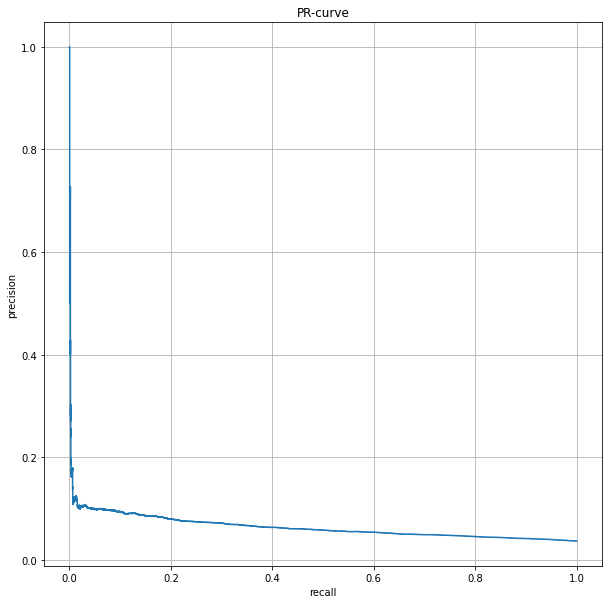

In [ ]:
plot_curves(y_test, probs[:, 1], roc=False, pr=True)

По данной кривой можно сказать, что имеется сильный классовый дисбаланс в выборке. Так, Precision очень сильно убывает при росте recall, и при охвате всей выборки (recall = 1) имеем точность только около 3-4 процентов.

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [ ]:
# нас интересует, чтобы TP /(TP+FP) была >= 95% то есть precision >= 95% нас интересует
precision, recall, thresholds = precision_recall_curve(y_test, probs[:,1])
probs_ = model.predict_proba(X_train_one_hot)[:, 1]
for i in range(len(thresholds)):
    if precision[i] >= 0.95:
        print(precision[i], thresholds[i])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


1.0 0.4837454999038508
1.0 0.5166796566299865


In [ ]:
# нас интересует, чтобы TP /(TP+FP) была >= 95% то есть precision >= 95% нас интересует
precision, recall, thresholds = precision_recall_curve(y_test, probs[:,1])
probs_ = model.predict_proba(X_train_one_hot)[:, 1]
for i in range(len(thresholds)):
    if precision[i] >= 0.95:
        print(precision[i], thresholds[i])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


1.0 0.4837454999038508
1.0 0.5166796566299865


Получилось, что можно выбрать порог в диапазоне $[≈0.484, \approx0.517]$, и в таком случае среди наших положительных предсказаний доля действительно обратившихся в страховую будет больше 95 процентов. (на обучающей выборке она вообще равна 100%).

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной. 

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. Доход, очевидно, считается только по тем людям, которым мы предполагаем что не отказали.

__(1 балл)__

In [ ]:
from tqdm import tqdm
probs = model.predict_proba(X_train_one_hot)[:, 1]
good_thresholds = []
for i in tqdm(range(len(thresholds))):
    thr = thresholds[i]
    mask = probs>thr # кому отказали
    balance = 100000 * ((mask & (y_train == 1)).sum()) - 5000 * ((mask & (y_train == 0)).sum())
    if balance > 0:
        good_thresholds.append((thr, balance))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
100%|██████████| 118899/118899 [02:10<00:00, 913.23it/s]


In [ ]:
print('Минимальный порог при котором баланс неотрицательный:', min(good_thresholds)[0])

Минимальный порог при котором баланс неотрицательный: 0.029891356609984678


А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [ ]:
thr, balance = max(good_thresholds, key=lambda x: x[1]) # сортируем по этой разности

print('Optimal threshold is', thr)
print('При таком пороге откажем', (probs>thr).sum(), 'клиентам')
print('Максимальная разница составила', balance)

Optimal threshold is 0.04695997077556807
При таком пороге откажем 96267 клиентам
Максимальная разница составила 182160000


## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

In [3]:
!apt-get install libboost-program-options-dev zlib1g-dev libboost-python-dev vowpal-wabbit # чтобы работало на google colab
!pip install vowpalwabbit

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libboost-program-options-dev is already the newest version (1.65.1.0ubuntu1).
libboost-program-options-dev set to manually installed.
libboost-python-dev is already the newest version (1.65.1.0ubuntu1).
libboost-python-dev set to manually installed.
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2.2).
zlib1g-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libvw0
Suggested packages:
  vowpal-wabbit-doc
The following NEW packages will be installed:
  libvw0 vowpal-wabbit
0 upgraded, 2 newly installed, 0 to remove and 5 not upgraded.
Need to get 797 kB of archives.
After this operation, 3,034 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libvw0 amd64 8.

Проверяем, что все установилось

In [4]:
!vw --version

8.5.0


Монтируемся к гугл диску

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
directory = '/content/gdrive/MyDrive/MMRO_MSU/CTR prediction/'

Читаем датасет, его небольшую часть, чтобы получить хотя бы общее представление о нем

In [7]:
data = pd.read_csv(directory + 'train.csv', nrows=1000)
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [8]:
data.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

Видно, что признаки делятся по нескольким типам: это признаки, характерные для сайта, признаки приложения, признаки конкретного устройства, также положение баннера с рекламой, время показа и другие признаки, а также не имеющий смысла в нашей задаче признак id и целевая переменная click

In [9]:
data.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+03,1000.000000,1000.0,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.402135e+18,0.160000,14102100.0,1005.019000,0.185000,1.04700,0.178000,17716.240000,318.368000,56.488000,1968.148000,0.789000,124.672000,37637.883000,88.556000
std,2.390389e+18,0.366789,0.0,1.033299,0.388492,0.55054,0.605543,3115.731031,9.998227,35.787632,380.270482,1.227186,232.189622,48512.364147,46.087253
min,1.004777e+16,0.000000,14102100.0,1001.000000,0.000000,0.00000,0.000000,377.000000,216.000000,36.000000,112.000000,0.000000,35.000000,-1.000000,13.000000
25%,1.002866e+19,0.000000,14102100.0,1005.000000,0.000000,1.00000,0.000000,15705.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,61.000000
50%,1.006611e+19,0.000000,14102100.0,1005.000000,0.000000,1.00000,0.000000,17653.000000,320.000000,50.000000,1974.000000,0.000000,35.000000,-1.000000,79.000000
75%,1.010323e+19,0.000000,14102100.0,1005.000000,0.000000,1.00000,0.000000,20362.000000,320.000000,50.000000,2277.000000,2.000000,39.000000,100084.000000,156.000000
max,1.014356e+19,1.000000,14102100.0,1010.000000,1.000000,5.00000,3.000000,21692.000000,320.000000,250.000000,2497.000000,3.000000,1835.000000,100233.000000,157.000000


In [11]:
from itertools import islice
from sklearn.metrics import roc_auc_score as auc

Vowpal wabbit предоставляет возможность разделить признаки по пространствам имен, то есть сгруппировать их. Давайте попробуем сгруппировать наши признаки по озвученным ранее категориям:

Также реализуем преобразование данных из формата .csv в специальный формат vw-строк. Для того чтобы vowpal wabbit мог использовать эти данные

In [18]:
from tqdm import tqdm
directory = '/content/gdrive/MyDrive/MMRO_MSU/CTR prediction/'
vw_dir = '/content/gdrive/MyDrive/MMRO_MSU/vw/'
namespaces = ['|time h:','|C1_feature c1=','|banner b:','|site_features i=', 'd=', 'c=',
              '|app_features id=', 'domain=', 'category=',
              '|device_features id=', 'ip=', 'model=', 'type=', 'conn_type=',
              '|C_features c14=', 'c15=', 'c16=', 'c17=', 'c18=', 'c19=', 'c20=', 'c21=',]

with open(directory + 'train.csv', 'r') as in_file:
    in_file.readline()
    with open(vw_dir + 'train.vw', 'w') as out_file:
        for line in tqdm(islice(in_file, 30000000)):
            s = line.strip().split(',')
            label = -1 if s[1] == '0' else 1
            features = ' '.join(p + f for p, f in zip(namespaces, s[2:]))
            vw_str = str(label) + ' ' + features + '\n'
            out_file.write(vw_str)

    with open(vw_dir + 'test.vw', 'w') as out_file:
        y_test_ = []
        for line in tqdm(in_file):
            s = line.strip().split(',')
            label = -1 if s[1] == '0' else 1
            features = ' '.join(p + f for p, f in zip(namespaces, s[2:]))
            out_file.write(features + '\n')
            y_test_.append(label)
    np.save(vw_dir + 'y_test.npy', np.array(y_test_), allow_pickle=False)

30000000it [05:25, 92285.73it/s]
10428967it [02:36, 66482.28it/s] 


In [19]:
cd  gdrive/My\ Drive/MMRO_MSU

[Errno 2] No such file or directory: 'gdrive/My Drive/MMRO_MSU'
/content/gdrive/My Drive/MMRO_MSU


Запустим нашу модель для обучения на указанном файле с данными, минимизируя нужную нам функцию потерь. Укажем, что нам нужно сохранить (-f) нашу модель (для дальнейшего тестирования и, возможно, дообучения)

In [20]:
!vw ./vw/train.vw -f ./vw/model.vw --loss_function logistic

final_regressor = ./vw/model.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = ./vw/train.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000       22
0.488136 0.283124            2            2.0  -1.0000  -1.1170       22
0.304292 0.120448            4            4.0  -1.0000  -2.2664       22
0.214658 0.125024            8            8.0  -1.0000  -2.3124       23
0.363789 0.512921           16           16.0  -1.0000  -2.6336       22
0.393967 0.424145           32           32.0  -1.0000  -1.8419       22
0.519313 0.644659           64           64.0  -1.0000  -0.8042       22
0.532549 0.545786          128          128.0  -1.0000  -1.2779       22
0.489411 0.446273          256          256.0   1.0000  -1.7984       22
0.458618 0.427824          512  

Давайте загрузим полученную модель после обучения. Для этого используем аргумент -i.
Протестируем её на тестовом наборе данных (аргумент -t).
Полученные предсказания запишем в файл, чтобы затем считать их оттуда и посчитать качество нашей модели. Для этого используем аргумент -p.

In [21]:
!vw -i ./vw/model.vw -t ./vw/test.vw -p ./vw/y_pred.txt --link logistic

only testing
predictions = ./vw/y_pred.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = ./vw/test.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
    n.a.     n.a.            1            1.0  unknown   0.0652       22
    n.a.     n.a.            2            2.0  unknown   0.2088       23
    n.a.     n.a.            4            4.0  unknown   0.0956       22
    n.a.     n.a.            8            8.0  unknown   0.0195       22
    n.a.     n.a.           16           16.0  unknown   0.0995       22
    n.a.     n.a.           32           32.0  unknown   0.0502       22
    n.a.     n.a.           64           64.0  unknown   0.2690       22
    n.a.     n.a.          128          128.0  unknown   0.1743       22
    n.a.     n.a.          256          256.0  unknown   0.3242       23
    n.a.     n.a.     

In [ ]:
test_target = np.load(vw_dir + 'y_test.npy')

Загружаем наши предсказания для тестовой выборки

In [22]:
print(auc(test_target, np.loadtxt(vw_dir + 'y_pred.txt')))

0.7395448318751547

Получили значение метрики выше baseline. Скорее всего, помогла удачная группировка признаков в пространства.

Довольно интересно было бы поработать еще с этой библиотекой. Она необычна для меня тем, что, в отличие от более привычных инструментов, здесь обучение, тестирование и использование моделей происходит через консоль, и можно с помощью аргументов задавать различные параметры использования моделей.

Например, -l отвечает за темп обучения (по умолчанию, похоже, равный 0.5).